Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [30]:
library(ggplot2)
library(rsample)
library(parsnip)
library(yardstick)
library(tidyverse)


Attaching package: ‘yardstick’


The following object is masked from ‘package:readr’:

    spec




The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [4]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Glimpse the `diabetes_train` table.

In [6]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 5, 10, 4, 10, 1, 1, 5, 6, 10, 4, 11, 3, 7,…
$ Glucose                  <dbl> 89, 116, 115, 110, 139, 103, 97, 117, 92, 122…
$ BloodPressure            <dbl> 66, 74, 0, 92, 80, 30, 66, 92, 92, 78, 60, 76…
$ SkinThickness            <dbl> 23, 0, 0, 0, 0, 38, 15, 0, 0, 31, 33, 0, 25, …
$ Insulin                  <dbl> 94, 0, 0, 0, 0, 83, 140, 0, 0, 0, 192, 0, 70,…
$ BMI                      <dbl> 28.1, 25.6, 35.3, 37.6, 27.1, 43.3, 23.2, 34.…
$ DiabetesPedigreeFunction <dbl> 0.167, 0.201, 0.134, 0.191, 1.441, 0.183, 0.4…
$ Age                      <dbl> 21, 30, 29, 30, 57, 33, 22, 38, 28, 45, 33, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:** In a logistic regresion you want the "outcome", also known as the dependent variable, to be categorical, typically a bianary representing two different classes. In the case of the Pima Indians Diabetes Database the best choice is the 'Outcome' column, which is a bianry column with 1 representing the presence of diabetes, and 0 indicating the absence of diabetes.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
| BMI         |  Body mass index (weight in kg/(height in m)^2) |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

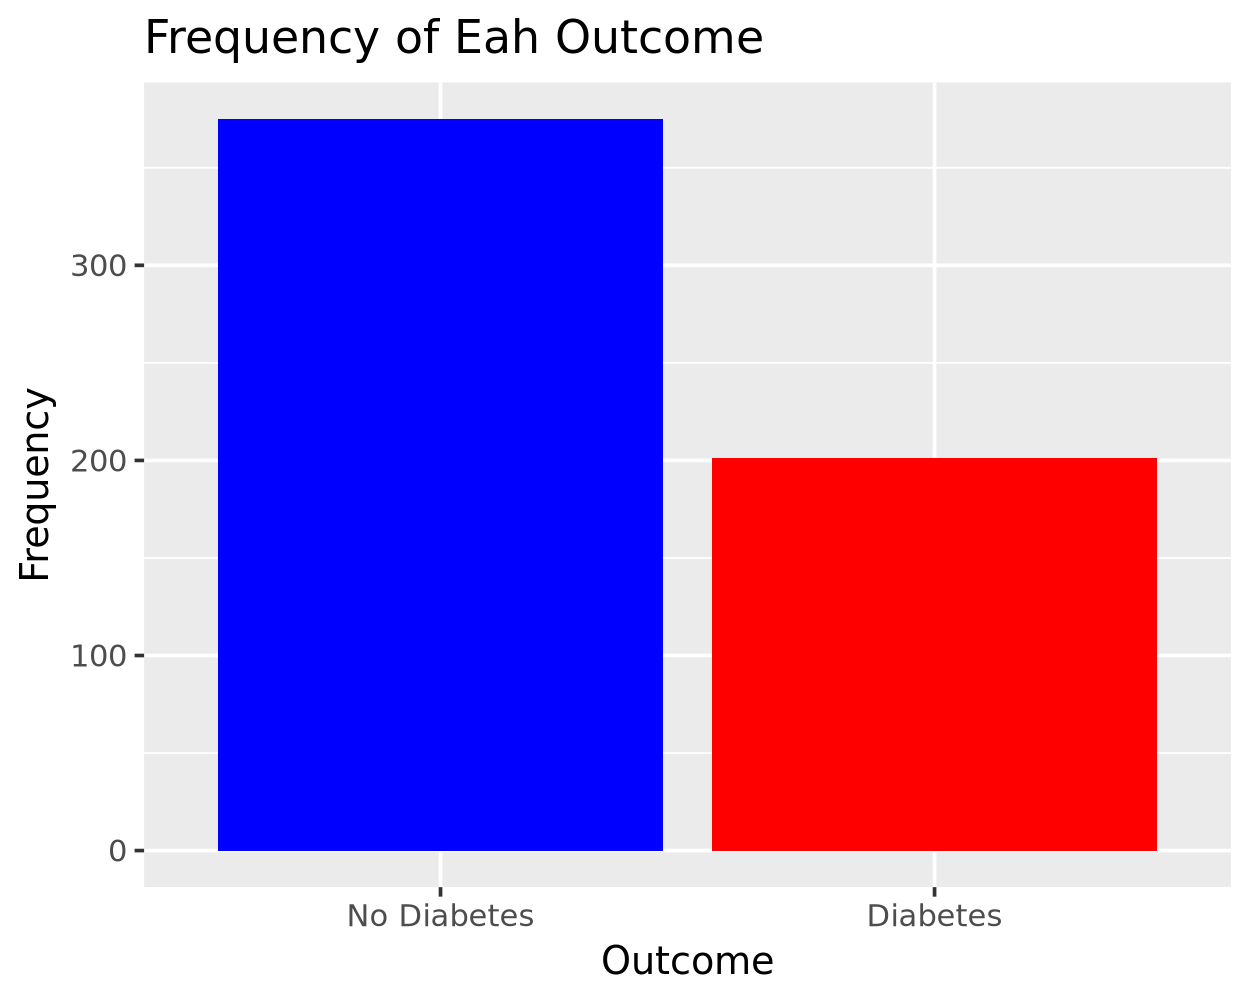

In [7]:
# bar chart to show the frquency of each outcome
ggplot(diabetes_train, aes(x = Outcome)) +
    geom_bar(fill = c("blue", "red")) + 
    labs(title = "Frequency of Eah Outcome",
         x = "Outcome",
         y = "Frequency") +
    scale_x_discrete(labels = c("No Diabetes", "Diabetes"))

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:** We can see there are almost twcie as many cases with no diabetes, compared to cases that do test positive. Such an imbance in results can heavily affect the performce of logistic regression models, as the model will tend to become biased towards predicting the more frequent class (No Diabetes). 

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [8]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

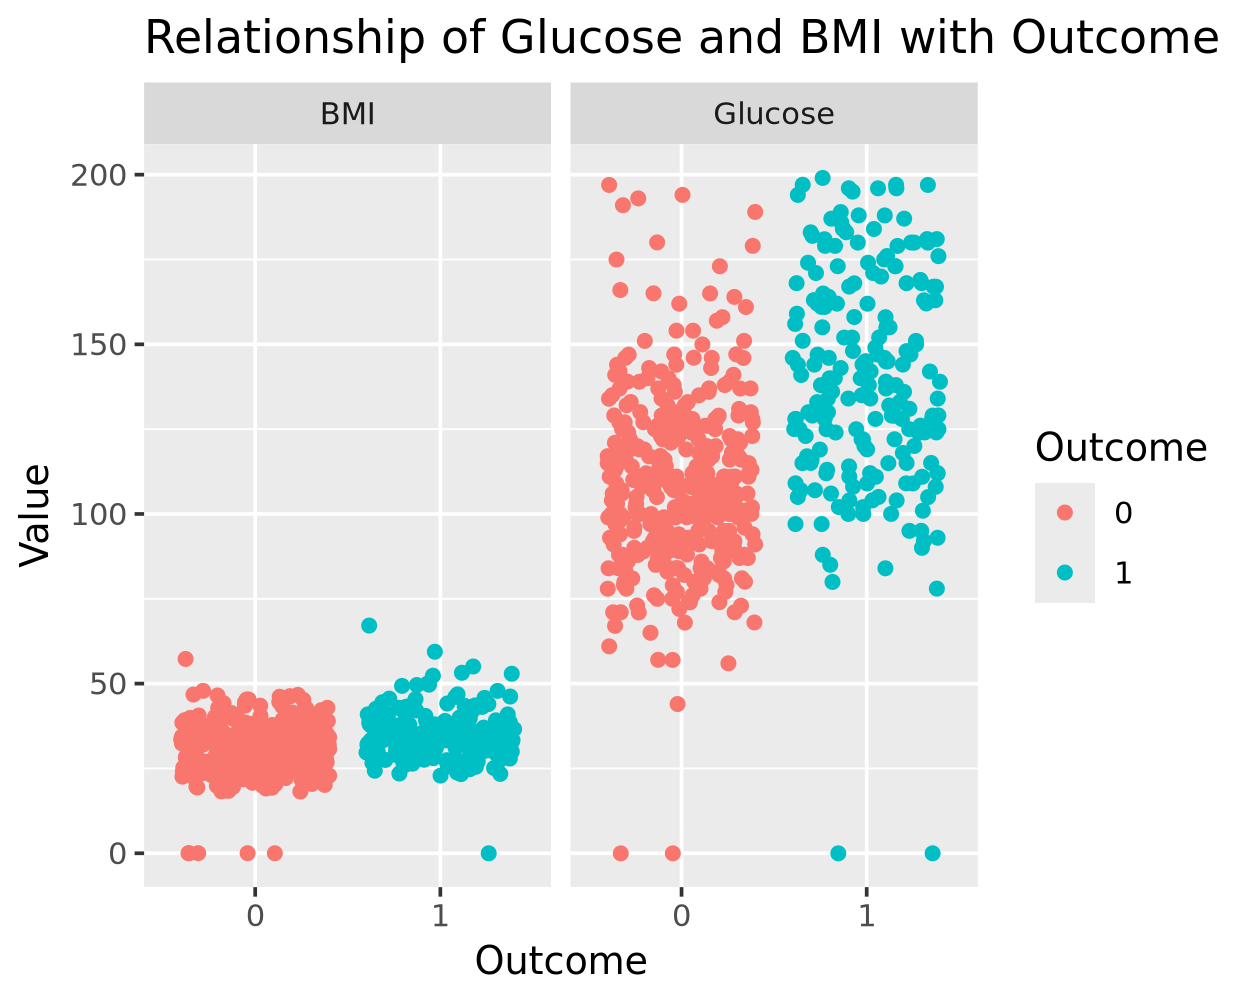

In [9]:
ggplot(plot_df, aes(x = Outcome, y = value, color = Outcome)) +
    geom_jitter() +
    facet_wrap(~ name, ncol = 2, scales = 'free_x') +
    labs(title = "Relationship of Glucose and BMI with Outcome",
         x = "Outcome",
         y = "Value") 

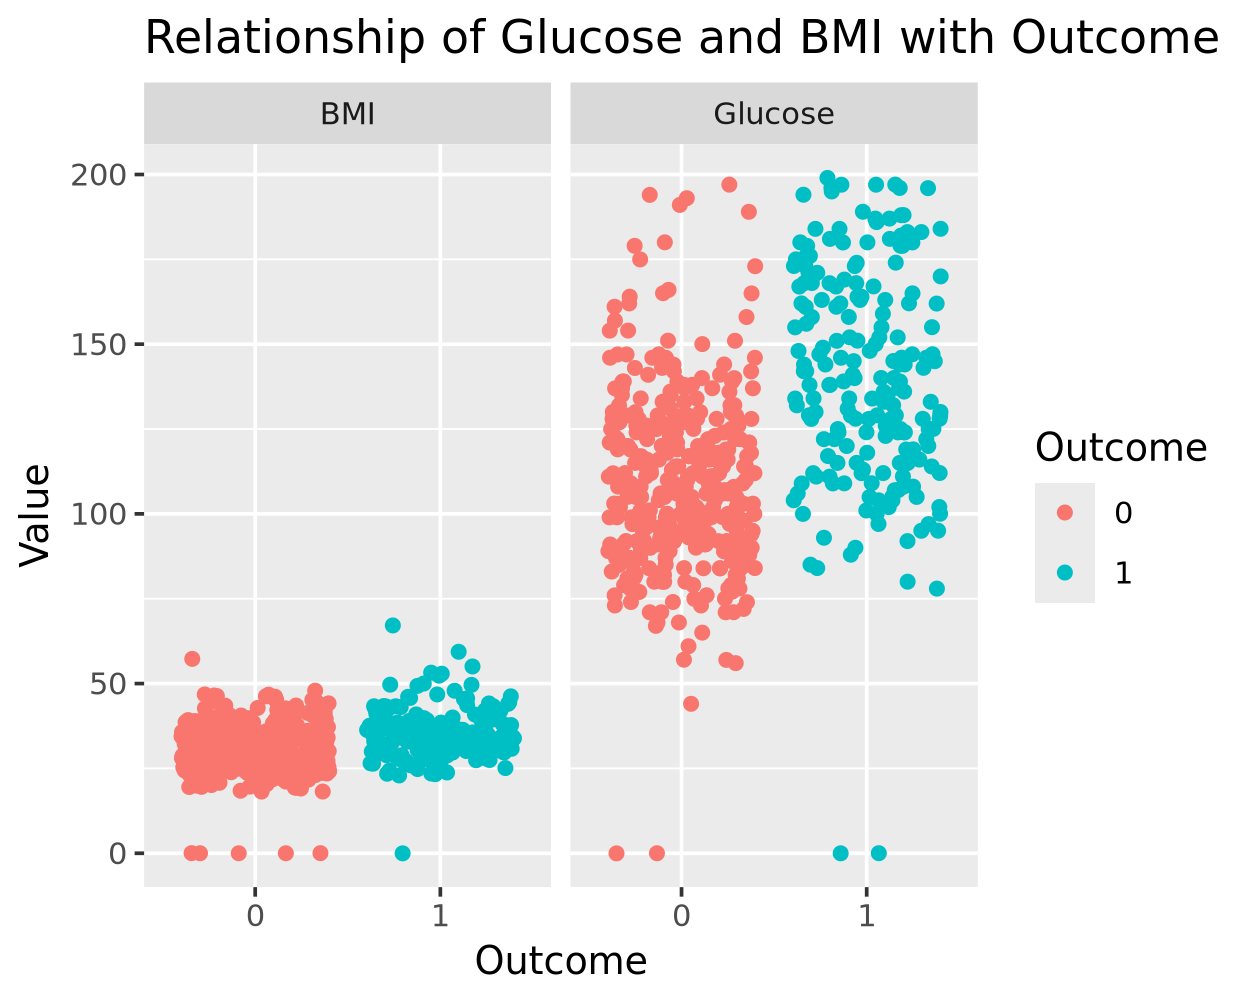

In [10]:
ggplot(plot_df, aes(x = Outcome, y = value, color = Outcome)) +
    geom_jitter() +
    facet_wrap(~ name, ncol = 2) +
    labs(title = "Relationship of Glucose and BMI with Outcome",
         x = "Outcome",
         y = "Value") 

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:** When the "scales = 'free_x'" is removed the x-axis of all facets will be fixed, meaning that the same x-axis will be used for both facets. This can become problamatic since the two variables have significaly different ranges of values, which can cause one of the plots to appears compressed or distorted.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [23]:
# define the logistic model
logistic_model <- logistic_reg() %>%
    set_engine("glm")

# specify the model formula
model_form <- Outcome ~ BMI + Glucose

# fit the model to the training data
mod_fit <- logistic_model %>%
    fit(model_form, data = diabetes_train)

# view model summary
logistic_fit

parsnip model object


Call:  stats::glm(formula = Outcome ~ BMI + Glucose, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)          BMI      Glucose  
   -7.69055      0.08170      0.03569  

Degrees of Freedom: 575 Total (i.e. Null);  573 Residual
Null Deviance:	    745.1 
Residual Deviance: 578.6 	AIC: 584.6

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [34]:
# use augment to generate predictions to the test set
diabetes_test_wPred <- augment(mod_fit, new_data = diabetes_test)

# view first rows of predictions
head(diabetes_test_pred)

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.9230090,0.07699095,1,85,66,29,0,26.6,0.351,31,0
1,0.1804462,0.81955379,1,189,60,23,846,30.1,0.398,59,1
1,0.4155106,0.58448937,5,166,72,19,175,25.8,0.587,51,1
0,0.8105756,0.18942442,7,107,74,0,0,29.6,0.254,31,1
1,0.4958005,0.50419952,3,126,88,41,235,39.3,0.704,27,0
0,0.7799474,0.22005258,8,99,84,0,0,35.4,0.388,50,0


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [35]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 102  24
         1  23  43

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:** 

The total number of cases with diabetes is the sum of the secound column, meaning that there are 67 individuals within the test set that have diabetes.

Of the 67 individuals that actually had diabetes, the model we created accurately predicted 43 cases.

The number of false positive generated by our model is 24, predicting that they had diabetes, when they actually did not.